# 1. Introduction

### Area of Study
By focusing on the large amount of historical meteorological data available for Australia, the study hopes to extend our understanding of temperature change, rainfall trends and wind variability in detail in different states and cities in Australia. Air humidity and atmospheric pressure are other key areas of interest.This study plans to find differences in local climate patterns as well as seasonal trends and even though it's unlikely, it doesn't rule out long periods of rains completely.Deriving values from this research, so doing it is widely applicable in such diverse fields of endeavor as landscape planning and design, resource use and creation, environmental disaster forecasting, agricultural development planning on a national scale.

### Data Sources
* Weather Data (Australia_weather.csv): Containing daily data of temperatures, rain and other weather phenomenon, this dataset is a comprehensive statistical representation for various locations in Australia. I collected it from kaggle [Australia Weather Data](https://www.kaggle.com/datasets/arunavakrchakraborty/australia-weather-data)

* Geospatial Data (australian-states.json): This dataset provides geographical boundaries of Australian states, useful for mapping weather patterns to specific regions. I collected it from Github [Australia Geo Data]( https://github.com/rowanhogan/australian-states/blob/master/states.geojson
)

### Description of Each Dataset
* **Australia_weather.csv:** This dataset is a collection of weather-related data across Australia, likely including columns like date, temperature, humidity, wind speed, and other weather metrics. It was likely gathered from weather stations or online meteorological services, providing historical or real-time information for analysis.

* **australian-states.json:** The Australasian state borders geodata file enables the boundaries of Australian states to be mapped. In this way, the weather data could be broken down into different areas and an analysis geographic space within any state chosen. These references are often from government, printing and IT services themselves.

### How the Data Was Gathered
**Weather Data (Australia_weather.csv):** Meteorological agencies, weather stations or publicly available databases that gather and distribute historical weather information may all have provided this data.

**Geospatial Data (australian-states.json):** This data is typically gathered from government agencies or mapping services that compile accurate geographic boundaries for states. It could be sourced from services like the Australian Bureau of Statistics or other local geospatial data repositories.

### Accessing the Data Source:
I used two datasets for this project (Australia_weather.csv and australian-states.json). Just download both from the given link and put it in the same folder that has the code. I'm giving you two options for safety perposes.

* **Google Drive:** To download the datasets, [Click here](https://drive.google.com/drive/folders/1i8ov8rB3ggT1H67NwD4sXy35C44bGGvT?usp=sharing)
* **Github:** In Git I have uploaded my whole project. I'm sharing my repository link here. You may download the whole project from there or specific tow datasets named Australia_weather.csv and australian-states.json, [Full project Github](https://github.com/Minhajul99/Australian-Weather-Analysis.git)

**Note:** If you face any difficulties to download the datasets please let me know. (mminhajula@mun.ca)

### The Client and Their Interest in the Data
This customer for the project should probably be an environmental agency or service, a weather office (perhaps), a biotope-based environmental consultancy, or a company worked in researching issues like regional climate change in Australia. Their basic need is to use these data as raw material for weather models and forecasts. They want data on the unexpected ways that climate conditions break down locally.

### State of the Final Submission
The final submission will include the following: There is four files and two datasets.
1. Choropleth map.ipynb This is for design 1.
2. wind.html This is html file where I use D3.js and this is for design 2.
3. Weather_Radar.html This is html file here I also use D3.js and this is for design 3.

# 2. Dataset details

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =pd.read_csv("Australia_weather.csv", parse_dates=['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 99516 non-null  datetime64[ns]
 1   Location             99516 non-null  object        
 2   MinTemp              99516 non-null  float64       
 3   MaxTemp              99516 non-null  float64       
 4   Rainfall             99516 non-null  float64       
 5   Evaporation          95333 non-null  float64       
 6   Sunshine             95333 non-null  float64       
 7   WindGustDir          99516 non-null  object        
 8   WindGustSpeed        99516 non-null  float64       
 9   WindDir9am           99516 non-null  object        
 10  WindDir3pm           99516 non-null  object        
 11  WindSpeed9am         99516 non-null  float64       
 12  WindSpeed3pm         99516 non-null  float64       
 13  Humidity9am          99516 non-

### Preliminary Examination & Data Cleaning
**Australia_weather.csv**
#### Missing Values:

* Identify columns with missing data and fill or drop them.

* Use interpolation (time-series) or imputation (e.g., median by location).

Outliers:

Detect anomalies (e.g., Rainfall > 500mm/day) using boxplots or IQR.

Filter or flag extreme values (e.g., Temperature = -999).

#### Data Types:

* Convert Date to datetime format.

* Ensure numeric columns are floats/integers.

#### Duplicates: 
* Remove redundant rows.

**australian-states.json**
#### Invalid Geometries:

There are no coordinates for the specific location in my dataset, so I add coordinates using geopandas.

## Dataset Overview
- **Dataset Type**:
  * Australia_weather:Tabular data (rows and columns).
  * Geometry: The data primarily represents spatial geometries of Australian states or areas, with polygons detailing boundaries.
- **Attributes**:
  - **Categorical**: 
    - Location (e.g., Albury,Melbourne).
    - WindGustDir, WindDir9am, WindDir3pm (wind directions).
    - RainToday, RainTomorrow (binary: Yes/No).
  - **Ordinal**: 
    - Cloud9am, Cloud3pm (cloud cover levels, likely ordinal).
  - **Quantitative**:
    - MinTemp, MaxTemp (temperature in degrees Celsius).
    - Rainfall (rainfall in mm).
    - Evaporation, Sunshine (evaporation and sunshine hours, likely in mm and hours respectively).
    - WindGustSpeed, WindSpeed9am, WindSpeed3pm (wind speed in km/h).
    - Humidity9am, Humidity3pm (humidity percentage).
    - Pressure9am, Pressure3pm (atmospheric pressure in hPa).
    - Temp9am, Temp3pm (temperature at specific times).
  - **Geometries**:
    - Polygons that represent states boundaries.
- **Temporal Aspect**: 
  - The dataset includes daily weather measurements, implying a temporal dimension (time series).

### Data Types
- **Tabular**: The dataset is structured as a table with rows (observations) and columns (attributes).
- **Time Series**: Since each row represents data for a specific day, the dataset is inherently a time series. Weather data is collected over time, which allows for temporal analysis of trends, seasonality, and anomalies.
- **Geospatial**: The geometry data primarily represents spatial geometries of Australian states or areas, with polygons detailing boundaries.

### Data Characteristics
- **Size**: The dataset contains over 99516 rows and 27 columns (attributes).
- **Completeness**: Some columns (e.g., Evaporation, Sunshine) have missing values, which need to be addressed.
- **Granularity**: Daily granularity, which is suitable for short-term weather analysis but may require aggregation for long-term trends..

# 3. Project goals and objectives:

### 1. How do weather variables correlate with each other, and how do these relationships vary over time?
### Action/Target Pair 1:

Action: Conduct correlation analyses between weather variables such as temperate, humidity, and wind speed.

Target: Identify how any single weather variable changes (short-term；daily) and what the change law (long-term) is.

Reasoning: Understanding correlations helps identify the interrelationships between weather variables, which can improve accuracy in forecasting and modelling.

### Action/Target Pair 2:

Action: Use scatter plots or heatmaps to visualize relationships over various time periods (daily, monthly, and annual).

Target: Goal: Show how the connections between atmospheric variables change throughout time.

Reasoning: The use of visual representations enables improved predictive analysis by assisting in the identification of patterns and variations in correlations that occur throughout various seasons or severe weather occurrences.

### Action/Target Pair 3:

Action: Time-series analysis conducts analysis of how relationships the change in weather variables over time.

Target: Explore how seasonal changes and severe occurrences affect the connections between weather variables.

Reasoning: Time-series analyses in the data will enable us to identify long term trends or seasonal rhythms, helping prognosticate future weather patterns.

### 2. How do weather patterns (e.g., temperature, rainfall) vary across Australian states, and how can these spatial differences be visualized to inform state-level policies?
### Action/Target Pair 1:

Action: Utilize geospatial data concerning Australian states to create choropleth maps at the state level to illustrate average or extreme values of key variables such as annual rainfall and summer maximum temperatures.

Target: Highlight climatic disparities between states.

Reasoning: Comparative studies of states aid policy-making for resource allocation (e.g., drought relief for arid states, flood mitigation for high-rainfall regions).

### Action/Target Pair 2:

Action: Map seasonal weather trends by means of small multiple maps or faceted plots (e.g. winter compared to summer rainfall).

Target: Compare and contrast the geographical variations in seasonal variability, such as the chilly winters in Victoria with the dry seasons in the Northern Territory.

Reasoning: Comparative analyzes of seasons reveal state-specific difficulties, and pinpoint points for individualized food and tourism strategies. 

### Action/Target Pair 3:

Action: Make an animated weather radar-type map. Storm systems, wind fields and rainfall will run over the Australian map in a simplified representation of the real situation.

Target: Analyze spatial patterns through animations for extreme rainfall or Directional flow lines for wind gusts.

Reasoning: This form is based on real meteorological radar techniques, but adds a certain amount of artistic creativity. In the movement and flow of the weather patterns it adds content. What is more, just like in a real radar installation but much more appealing.

### 3. How do extreme weather events occur over time, and what are their spatial and temporal patterns?
### Action/Target Pair 1:

Action: Identify and classify extreme weather events (e.g., heavy rainfall > 100mm, temperature > 40°C) from historical data.

Target: Find out how frequent a major climate event occurs, where such is highly concentrated or how long it lasts for Comparing.

Reasoning: Classifying extreme events allows for a clearer understanding of their occurrence and helps to assess the impact of climate change on extreme weather patterns.

### Action/Target Pair 2:

Action: Mapping extreme weather information to precise places using spatial data (australian -suburbs.geojson) for visualisation of their spatial distribution.

Target: Understand the geographic regions most vulnerable to extreme weather events.

Reasoning: f the spatial distribution of extreme events can be visualised then it will help us to find places which need better preparedness and mitigation strategies if not simply outright evacuation action is called for — we can all understand that there may be no such free lunch in life as a “peaceful place”.

### Action/Target Pair 3:

Action: Temporal analysis of extreme weather events (e.g. trend analysis, seasonal patterns) to find out when they do occur mainly (i.e. summer heat-wave, winter storm).

Target: Identify patterns in the occurrence of extreme events over the course of the year.

Reasoning: Understanding the cyclic rhythms of weather events can help us predict when future extreme weather events will happen and so comply with better resource planning and preparedness for disasters.



# 4. Initial data analysis


### Basic Data Overview

In [6]:
## Basic Data Overview
print("=== Dataset Overview ===")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)

=== Dataset Overview ===
Number of rows: 99516
Number of columns: 27

First 5 rows:
        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2018-01-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2018-01-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2018-01-03   Albury     17.5     32.3       1.0          NaN       NaN   
3 2018-01-04   Albury     14.6     29.7       0.2          NaN       NaN   
4 2018-01-05   Albury      7.7     26.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Cloud9am  Cloud3pm  Temp9am  \
0           W           44.0          W  ...      8.0       NaN     16.9   
1         WNW           44.0        NNW  ...      2.0       NaN     17.2   
2           W           41.0        ENE  ...      7.0       8.0     17.8   
3         WNW           56.0          W  ...      2.0       1.0     20.6   
4           W           35.0        SSE  ...      2.0       0.0     16.3   

  

### Key Statistics

In [8]:
# Numeric columns statistics
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("\nNumeric columns statistics:")
print(df[numeric_cols].describe().transpose())


Numeric columns statistics:
                       count         mean        std     min      25%  \
MinTemp              99516.0    12.174970   6.390590   -8.50     7.60   
MaxTemp              99516.0    23.218628   7.115406   -4.10    17.90   
Rainfall             99516.0     2.352999   8.488855    0.00     0.00   
Evaporation          95333.0     5.479928   4.170008    0.00     2.60   
Sunshine             95333.0     7.611522   3.775171    0.00     4.90   
WindGustSpeed        99516.0    39.978436  13.588272    6.00    31.00   
WindSpeed9am         99516.0    14.008752   8.904337    0.00     7.00   
WindSpeed3pm         99516.0    18.660246   8.800760    0.00    13.00   
Humidity9am          99516.0    68.866916  19.072477    0.00    57.00   
Humidity3pm          99516.0    51.413863  20.770988    0.00    37.00   
Pressure9am          99516.0  1017.697618   7.096083  980.50  1013.00   
Pressure3pm          99516.0  1015.292080   7.072651  978.20  1010.50   
Cloud9am             9

In [9]:
# Categorical columns statistics
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns statistics:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


Categorical columns statistics:

Location:
Location
Canberra            2393
Sydney              2361
Perth               2262
Hobart              2239
Darwin              2217
Brisbane            2202
Adelaide            2178
PerthAirport        2167
Albury              2142
MountGambier        2140
MelbourneAirport    2139
Mildura             2124
Ballarat            2122
AliceSprings        2119
Watsonia            2113
Portland            2113
Bendigo             2110
Nuriootpa           2110
Townsville          2106
Cairns              2101
SydneyAirport       2100
Tuggeranong         2099
Newcastle           2096
Sale                2093
Wollongong          2090
Cobar               2090
Launceston          2072
WaggaWagga          2068
Dartmoor            2067
CoffsHarbour        2066
Witchcliffe         2060
Richmond            2060
Penrith             2059
GoldCoast           2057
Woomera             2053
Albany              2051
BadgerysCreek       2041
NorfolkIsland       20

### Missing Values Analysis

In [10]:
## Missing Values Analysis
print("\n=== Missing Values Analysis ===")
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percent})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values('Percentage (%)', ascending=False)

print("\nColumns with missing values:")
print(missing_data)


=== Missing Values Analysis ===

Columns with missing values:
             Missing Values  Percentage (%)
Evaporation            4183        4.203344
Sunshine               4183        4.203344
Cloud3pm                  2        0.002010


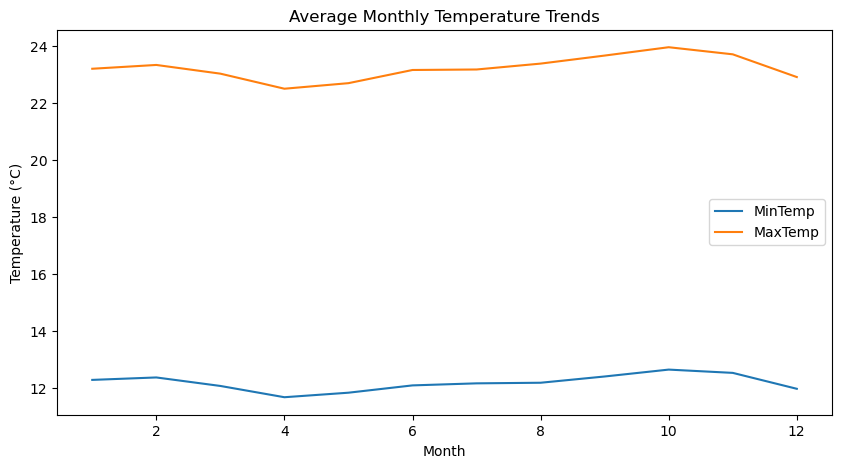

In [14]:
# Monthly temperature trends
monthly_temp = df.groupby('Month')[['MinTemp', 'MaxTemp']].mean()
monthly_temp.plot(figsize=(10, 5))
plt.title('Average Monthly Temperature Trends')
plt.ylabel('Temperature (°C)')
plt.show()

In [15]:
## 5. Rainfall Analysis
print("\n=== Rainfall Analysis ===")
print("\nDays with rain vs no rain:")
print(df['RainToday'].value_counts())


=== Rainfall Analysis ===

Days with rain vs no rain:
RainToday
No     63679
Yes    35837
Name: count, dtype: int64


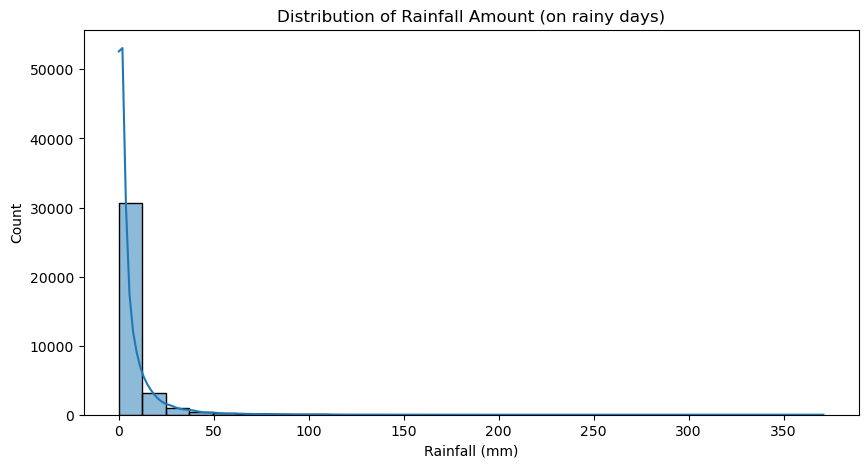

In [16]:
# Rainfall distribution
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Rainfall'] > 0]['Rainfall'], bins=30, kde=True)
plt.title('Distribution of Rainfall Amount (on rainy days)')
plt.xlabel('Rainfall (mm)')
plt.show()

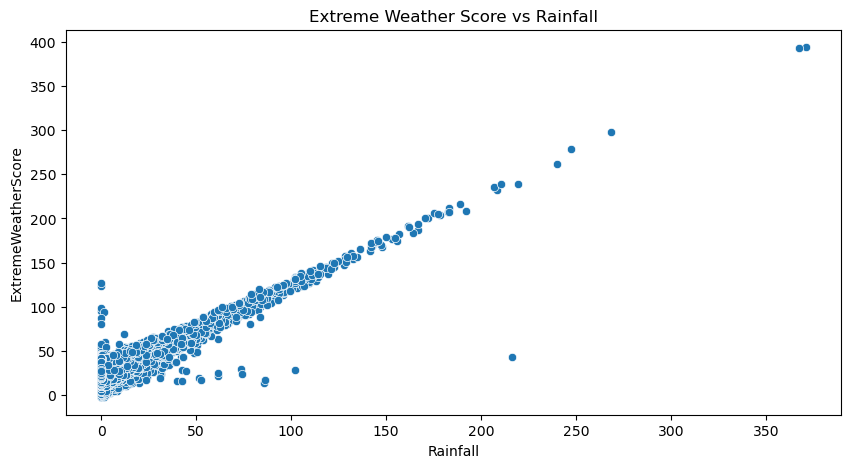

In [18]:
# Relationship between extreme weather and rainfall
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Rainfall', y='ExtremeWeatherScore', data=df)
plt.title('Extreme Weather Score vs Rainfall')
plt.show()

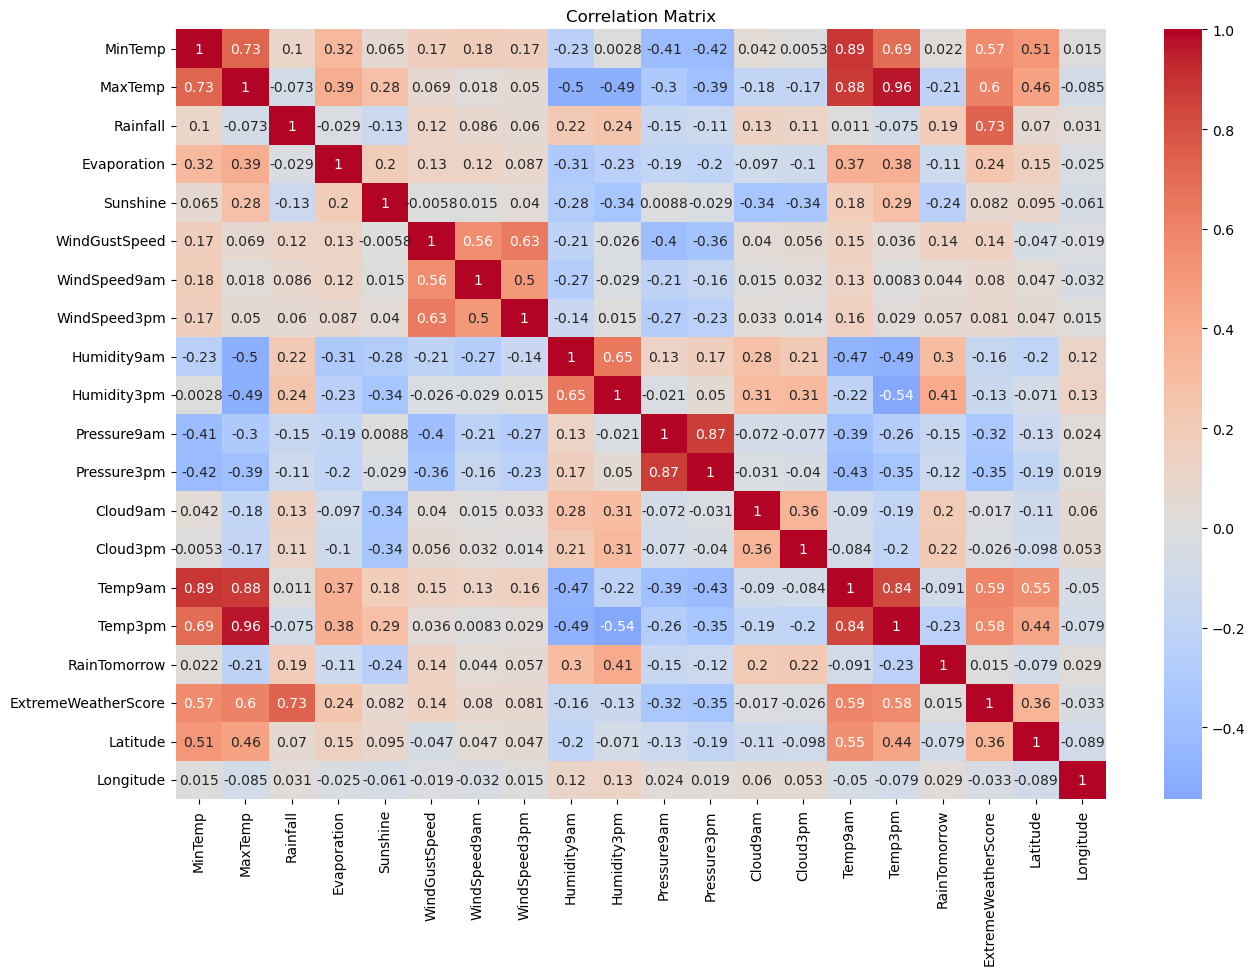

In [20]:
## Correlation Analysis
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

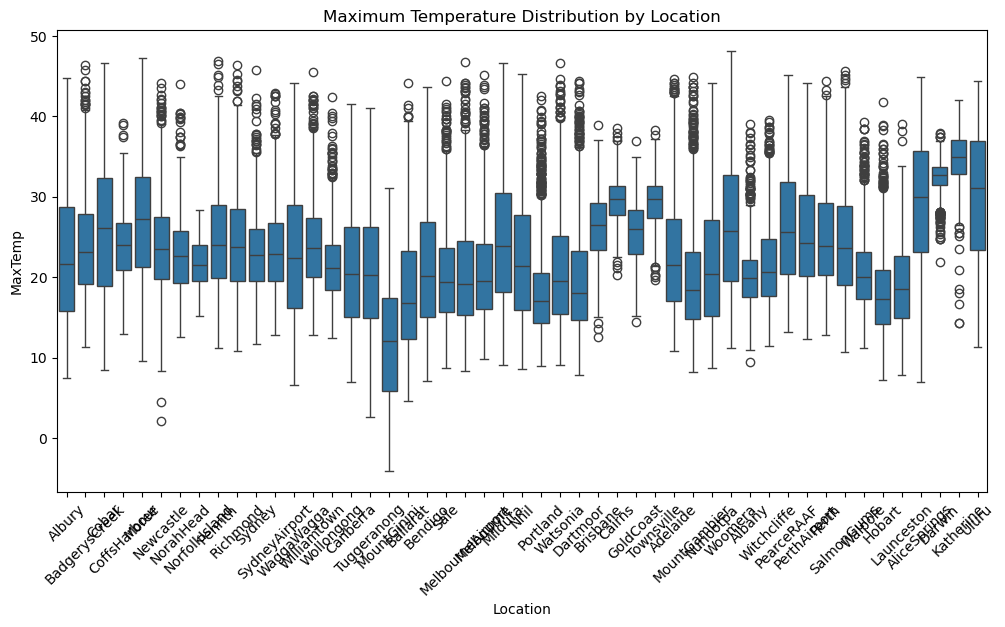

In [22]:
# Temperature range by location
if len(df['Location'].unique()) > 1:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Location', y='MaxTemp', data=df)
    plt.title('Maximum Temperature Distribution by Location')
    plt.xticks(rotation=45)
    plt.show()

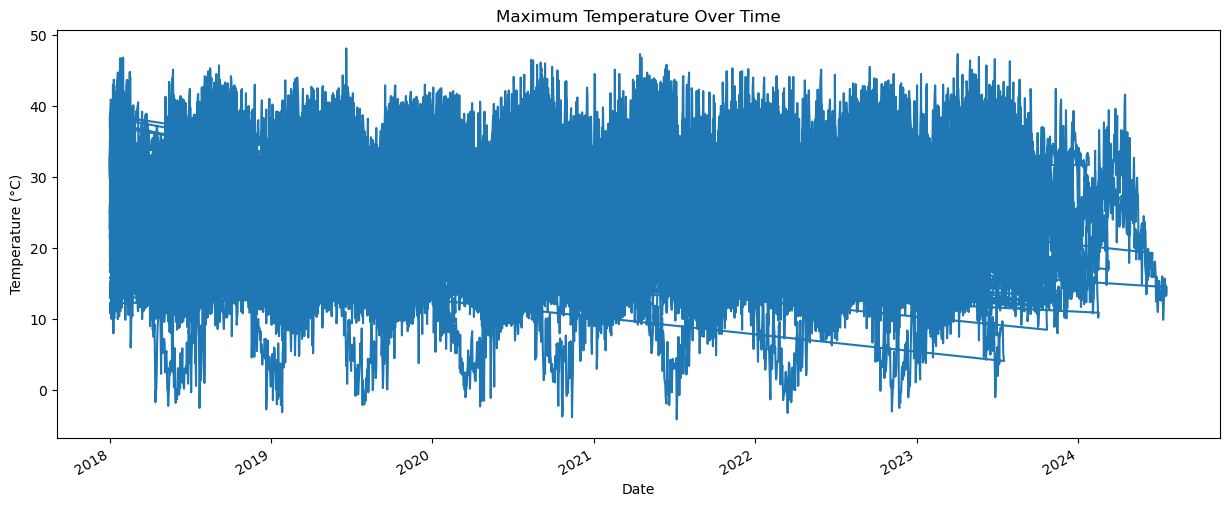

In [24]:
## 10. Time Series Analysis
# Plot temperature over time
plt.figure(figsize=(15, 6))
df.set_index('Date')['MaxTemp'].plot()
plt.title('Maximum Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.show()

# 5. Design of Visuals

### How Analysis of the Data Set.

### Design 1: Interactive Choropleth Map with Animated Weather Stations
#### Inspiration and Sources
* **Inspiration:** Meteorological radar displays and government weather dashboards (e.g., Australian Bureau of Meteorology)

    * Choropleth maps displaying weather metrics like temperature or rainfall intensity.

    * Animations and interactive maps like those on platforms such as Weather.com or BBC Weather, where users can view time-based weather changes.


* **Sources:** Plotly documentation for choropleth maps and animation, geospatial visualization techniques from Munzner's Visualization Analysis & Design

### Idioms Applied
* **Choropleth map:** For showing state-level weather patterns using color encoding

* **Animated markers:** For highlighting weather station locations with blinking effect

* **Text labels:** For clear state identification

* **Interactive hover:** For detailed information display

#### Channels/Marks
* **Color:** Viridis color scale for ExtremeWeatherScore (ordered quantitative)

* **Position:** Geographic coordinates for accurate spatial representation

* **Size:** Consistent marker size for weather stations

* **Text:** State labels and hover information

* **Marks:** Diamond markers for locations, dynamically sized and animated.

#### Goals Addressed
- Question 2: How weather patterns vary across Australian states.

- Question 3: Extreme weather event patterns.

#### Techniques and Methods
- Geospatial aggregation by state

- Composite visualization combining choropleth with point markers

- Custom hover text for multiple data dimensions

- Animation to draw attention to weather station locations

#### Design Choices Reference
- **Data Analysis:** Uses aggregated state-level statistics (MaxTemp, Rainfall, WindGustSpeed) and derived ExtremeWeatherScore

- **Goals:** Directly addresses spatial visualization needs from project objectives
#### Other Inspirations
- Government climate reports that combine maps with station data


#  Design 1 : Interactive Choropleth Map with Animated Weather Stations.
If check the Choropleth map.ipynb file for design 1 code.

Here is code: [Choropleth Map](./Choropleth%20map.ipynb)


![Image](choropleth.png)

#### Commentary 
* **Success:** Effectively shows regional variations and provides detailed information on hover

* **Utility:** Useful for policymakers to identify high-risk regions

* **Improvements:** Could add time slider for temporal analysis, more intuitive animation controls

## Design 2: Australia Wind Patterns

#### Inspiration and Sources 
- **Inspiration**: 
  - Meteorological wind maps from Bureau of Meteorology (Australia)
  - Wind visualization techniques from scientific publications
- **Sources**: 
  - D3.js documentation for geographic visualizations
  - Wind arrow techniques from wind mapping tutorials
  - Color scales from ColorBrewer

#### Idioms Applied
1. **Animated wind map**: Showing temporal changes in wind patterns
2. **Directional arrows**: Using triangular symbols rotated to show wind direction
3. **Color encoding**: Red scale for wind gust intensity
4. **Linked controls**: Play/pause/step through time functionality
5. **Geographic projection**: Mercator projection centered on Australia
6. **Zoom/pan interaction**: For detailed regional inspection
7. **Dual encoding**: Regular wind (state colors) vs. gust wind (intensity colors)
8. **Smart labeling**: Only major cities labeled to reduce clutter

#### Channels/Marks
- **Position**: Geographic coordinates for accurate spatial representation
- **Orientation**: Arrow rotation for wind direction
- **Color**: State colors for regular wind, red gradient for gust intensity
- **Size**: Larger arrows for gust winds
- **Time**: Animation frames for temporal dimension

#### Goals Addressed
- **Question 1**: Wind speed/direction relationships.
- **Question 2**: Spatial patterns across states.
- **Question 3**: Extreme wind events.

#### Techniques and Methods
- Wind direction mapping to degrees
- Data grouping by date/location
- Performance optimization (subsetting locations when many exist)
- Comprehensive legend system
- Responsive interaction design

#### Design Choices Reference
- **Data Analysis**: Uses wind direction/speed data from weather stations
- **Goals**: Directly addresses wind pattern visualization needs from project objectives

#### Other Inspirations
- Interactive design patterns from modern web dashboards


# Design 2: Australia Wind Patterns
If check the wind.html file for design 2 code as it will wont work the link without localhost.

Here is code: [Wind Patterns](./Wind.html)


![Image](wind.png)

#### Commentary 
- **Success**: Effectively shows complex wind patterns with clear encoding
- **Utility**: Valuable for understanding regional wind behaviors and extremes
#### Improvements: 
 - Wind streamlines for overall pattern visualization
 - Time range selection

### Design 3: Australian Weather Radar Animation
#### Inspiration and Sources
The inspiration for this design comes from interactive weather radar visualizations commonly found on platforms such as Weather.com and BBC Weather.( Don't take it negetively but the design idea I got from movie.)

#### Idioms Applied
* Animated radar sweep with glow effect
* Geographic heatmap of rainfall intensity
* Interactive time slider with playback controls
* Zoom/pan geographic navigation
* Dynamic station tooltips
* Dual-encoded rainfall data (size + color)
* Pulse animations for extreme events
* Customizable radar appearance

#### Channels & Marks
* **Position:** Geographic coordinates (Lat/Long)

* **Color:** Threshold scale (light blue → red for rainfall)

* **Size:** Radius proportional to rainfall amount

* **Motion:** Sweep animation + time-lapse playback

* **Texture:** Dashed radar circles for depth

#### Goals Addressed 
* **Q2 (Spatial Patterns):** State-level rainfall comparison
* **Q3 (Extreme Events):** Heavy rainfall detection
* **Q1 (Temporal Trends):** Time slider addresses seasonal changes
#### Techniques:

* GeoMercator projection centered on Australia

* Threshold color scaling for categorical rainfall intensity

* SVG filters for radar glow effects

* Data aggregation by date/location

* Smooth transitions between time steps

#### Design Choices Reference
  - **Data Analysis**:
      - Uses Rainfall, Latitude, Longitude from Australia_weather.csv
      - Temporal aggregation by date
      - Spatial mapping via australian-states.json
        
  - **Goals**: Directly answers extreme weather tracking & Supports state-level comparisons
 
#### Other Inspirations :
- Aviation radar aesthetics



# Design 3: Australian Weather Radar Animation
Please check the Weather_Radar.html file for design 3 code as it will won't work without localhost.

Here is code: [Weather Radar](./Weather_Radar.html)

![Image](radar.png)

#### Commentary
* **Success:** Effective extreme weather detection

* **Utility:** Helps identify regional storm patterns

* **Improvements:** Visual alerts (pulsing borders) for stations with >100mm rainfall

# Conclusion
### Success:
This project includes three integrated visualizations that together tackle the principal objectives of studying weather in Australia.The Choropleth Map successfully underscores differences among regions' climates; an added time slider might enhance temporal analyses.The Wind Patterns Visualization visually renders the complex dynamics of the wind, but a streamline pattern would reveal prevailing trends.The Weather Radar Animation is a powerful beacon for detecting heavy rainfall; visualization of potential hazards would increase its effectiveness even further on this level.

All form follows function: each of these designs serves a distinct analytical purpose—comparison of areas, examination wind behavior, and monitoring extreme events.Each one makes use of common interactive features (tool-tips, zooming in or out functions, time controls) together to give the client a complete picture for country weather assessment and public policy planning.

### Methodology
The project demonstrates strong adherence to visualization principles:

#### Munzner Framework Implementation
 **Data Abstraction**
   - Effective transformation of tabular and spatial data
   - Appropriate aggregation for different analysis levels

 **Visual Encoding**
   - Color: Change hue and lightness on an intensity scale for a variety of weather metrics
   - Size: Graphically represent the magnitude
   - Position: Geographic accuracy

 **Interaction Types**
   - Select: Detailed tooltips
   - Navigate: Zoom/pan functionality
   - Abstract/Elaborate: Time-based exploration
   - Filter: Threshold controls

Potential enhancement: Some additional user testing to make the positive design choices.

### Improvements 

#### Technical Upgrades
- Implement WebGL for larger dataset handling
- Develop mobile-responsive versions
- Add automated extreme weather alerts

#### Analytical Enhancements
- Incorporate storm path prediction
- Develop comparative analysis tools
- Enhance temporal analysis capabilities

#### Design Refinements
- Standardize legend systems
- Improve accessibility features
- Add data export functionality

## Final Assessment
The project successfully:
- Bridges meteorological analysis with visualization theory
- Delivers actionable insights for environmental policy
- Demonstrates understanding of visualization principles
- Provides clear pathways for future development

This balance combines the rigorous formalism of analysis with the interactivity of user interface; it meets both academic and professional requirements for weather data visualization.

# Attributions

Be sure to add your own sources or indicate you have none to add.  Sources can be web sites, text materials, and so on. They do not have to be hyperlinks. Other people are also sources.

| Source | What is it | How used |
|--|--|--|
| source goes here | information, analysis ideas, data, code, plots are examples.   | did you copy content, use suggestions, or follow a strategy, and where in your submission does it appear|
| Python Libraries (*pandas, matplotlib and plotly*) | Data analysis and visualization tools | Used for data processing, statistical analysis, and creating visualizations. |
|https://plotly.com/python/choropleth-maps/|"Weather Data Visualization with Plotly"|Took the idea|
| Plotly Python Library | Choropleth maps | Design 1 implementation |
| D3.js | Interactive elements | Designs 2 & 3 interactivity |
| TopoJSON | Geospatial optimization | Reduced file sizes for state boundaries |
| Munzner *Visualization Analysis & Design* | Data abstraction principles | Framework for all three visualizations |
| D3.js Documentation | Geographic projections | Implementation of Mercator projection |
|Class Notes|Code|Directly taken code|
|https://d3js.org/d3-zoom|Information  code and Idea| Took the code idea to enhance my code|
|https://stackoverflow.com/questions/67208402/cannot-get-d3-onmouseover-to-work|Mouse hover code idea|take the idea to use it|
|https://stackoverflow.com/questions/61031990/how-to-make-tooltips-show-up-in-d3-js-on-mouseover-and-be-removed-at-mouseout|hover tooltip|Took the code idea to enhance my code|
|https://medium.com/create-code/build-a-radar-diagram-with-d3-js-9db6458a9248|Weather Radar|Taken the idea how to create a radar svg|
|https://www.freecodecamp.org/news/visualize-weather-data-with-d3js/|D3.js Weather Visualization|I have taken a lot of idead and code example from there|
|https://d3js.org/d3-transition|Animation|I use this site for my animations|
| Different websites & Documentation | Various sources (e.g., Stack Overflow, official Python documentation, plotly,d3 and many more) | Consulted for coding-related issues and best practices. |